In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/Fish.csv')

In [6]:
cond = df['Species'] == 'Perch'

perch_length = df.loc[cond, ['Length2']]
perch_weight = df.loc[cond, ['Weight']]

# perch_length

In [7]:
from sklearn.model_selection import train_test_split

In [16]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=100
)

In [27]:
train_input.head()

,Length2
100,25.6
109,32.8
114,37.0
110,34.5
123,42.0


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(train_input, train_target)

LinearRegression()

In [21]:
lr.score(test_input, test_target)

0.8854159312228587

In [22]:
lr.predict([[100]])

C:\Users\2-00\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3117.99371211]])

In [34]:
a = lr.coef_[0][0]
a

np.float64(38.052388445444635)

In [37]:
b = lr.intercept_[0]
b

np.float64(-687.2451324388538)

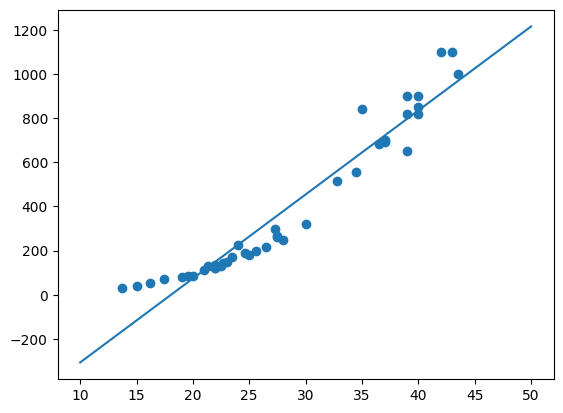

In [40]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_target['Weight'])
plt.plot([10, 50], [10*a + b, 50*a + b])
plt.show()

In [42]:
perch_length.head()

,Length2
72,8.4
73,13.7
74,15.0
75,16.2
76,17.4


In [43]:
train_input['Length2_poly'] = train_input['Length2'] ** 2
test_input['Length2_poly'] = test_input['Length2'] ** 2

In [44]:
train_input.head()

,Length2,Length2_poly
100,25.6,655.36
109,32.8,1075.84
114,37.0,1369.00
110,34.5,1190.25
123,42.0,1764.00


In [45]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [46]:
lr.coef_

array([[-26.99656509,   1.10288319]])

In [47]:
lr.intercept_

array([190.60650828])

In [51]:
lr.predict([[60, 60**2]])

C:\Users\2-00\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2541.19208279]])

In [52]:
lr.score(test_input, test_target)

0.9728102367657678

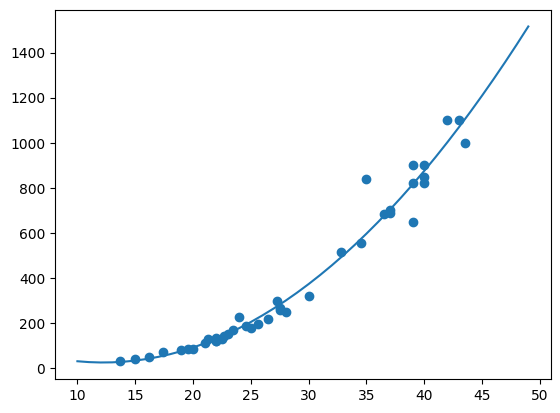

In [53]:
import matplotlib.pyplot as plt
import numpy as np

point = np.arange(10, 50)

plt.scatter(train_input['Length2'], train_target['Weight'])
# plt.plot([10, 50], [10*a + b, 50*a + b])
plt.plot(point, 1.1028 * point ** 2 + -26.9965 * point + 190.6065)

plt.show()